In [103]:
import importlib.util
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [104]:
spec = importlib.util.spec_from_file_location("DataPreprocessing", "/home/admin1/PycharmProjects/Machine_learning_Python/Utility/DataPreprocessing.py")
foo = importlib.util.module_from_spec(spec)
spec.loader.exec_module(foo)
preprocess_obj = foo.DataPreprocessing()

Data PreProcessign object created successfully


In [105]:
dataframe = pd.read_csv("Data/weatherHistory.csv")

In [106]:
dataframe.columns

Index(['Formatted Date', 'Summary', 'Precip Type', 'Temperature (C)',
       'Apparent Temperature (C)', 'Humidity', 'Wind Speed (km/h)',
       'Wind Bearing (degrees)', 'Visibility (km)', 'Loud Cover',
       'Pressure (millibars)', 'Daily Summary'],
      dtype='object')

In [107]:
dataframe = dataframe.head(2000)

In [108]:
dataframe = dataframe.rename(columns=({'Apparent Temperature (C)':'y'}))

In [109]:
dataframe = dataframe.drop(['Formatted Date','Summary','Precip Type','Loud Cover','Daily Summary'], axis =1 )

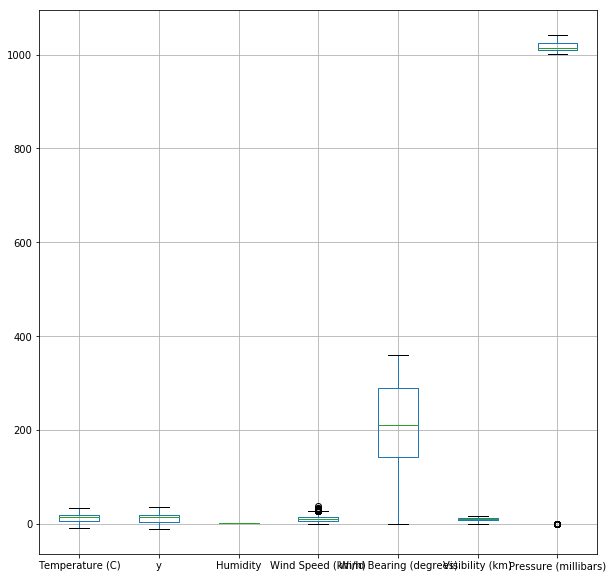

In [110]:
dataframe.boxplot(figsize=(10,10))

In [111]:
dataframe = preprocess_obj.remove_outlier(dataframe)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fb999b351d0>,
      dtype=object)

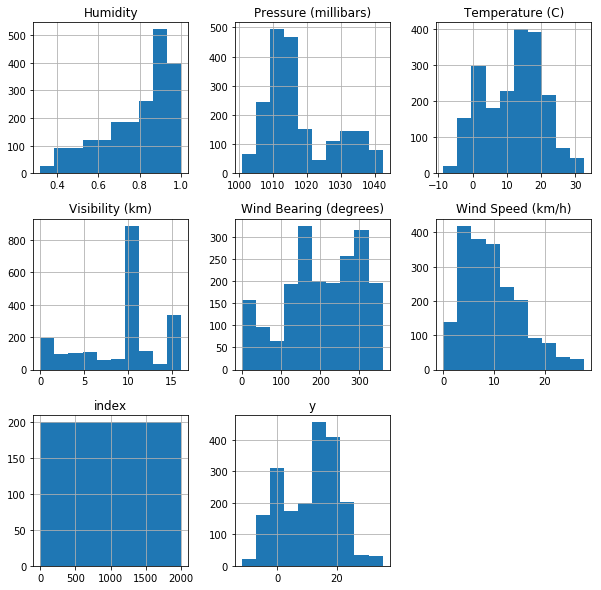

In [112]:
dataframe.hist(figsize=(10,10))

In [113]:
dataframe = dataframe.dropna()

In [114]:
dataframe.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1924 entries, 0 to 1999
Data columns (total 8 columns):
index                     1924 non-null int64
Temperature (C)           1924 non-null float64
y                         1924 non-null float64
Humidity                  1924 non-null float64
Wind Speed (km/h)         1924 non-null float64
Wind Bearing (degrees)    1924 non-null float64
Visibility (km)           1924 non-null float64
Pressure (millibars)      1924 non-null float64
dtypes: float64(7), int64(1)
memory usage: 135.3 KB


In [115]:
(dataframe==0).sum()

index                      1
Temperature (C)            3
y                          1
Humidity                   0
Wind Speed (km/h)         11
Wind Bearing (degrees)    18
Visibility (km)            6
Pressure (millibars)       0
dtype: int64

In [116]:
dataframe, test_data = preprocess_obj.split(dataframe,500)

In [117]:
y = dataframe['y']

In [118]:
for item in dataframe:
    dataframe[item] = preprocess_obj.feature_scaling(dataframe,item)    

In [119]:
# dataframe['y']=y

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fb999f4b080>,
      dtype=object)

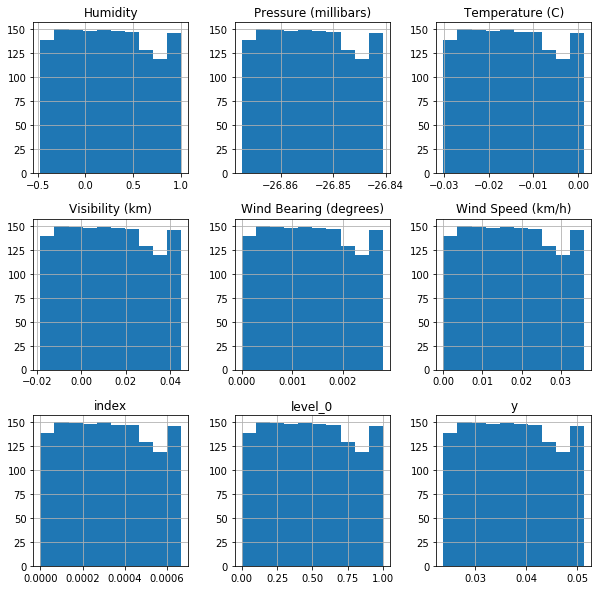

In [120]:
dataframe.hist(figsize=(10,10))

In [121]:
# sns.distplot(dataframe, color=['r','g','b','y','black','#ed0740','#ed9c07'])
# for items in dataframe:
#     sns.distplot(dataframe[items])
#     plt.show()

In [122]:
dataframe.describe().T

,count,mean,std,min,25%,50%,75%,max
level_0,1424.0,0.490753,0.286165,0.000000,0.245154,0.484291,0.726771,1.000000
index,1424.0,0.000328,0.000191,0.000000,0.000164,0.000324,0.000486,0.000668
Temperature (C),1424.0,-0.014670,0.009032,-0.030160,-0.022422,-0.014874,-0.007221,0.001403
y,1424.0,0.037332,0.007870,0.023835,0.030577,0.037154,0.043823,0.051337
Humidity,1424.0,0.251108,0.420830,-0.470588,-0.110068,0.241605,0.598193,1.000000
Wind Speed (km/h),1424.0,0.017691,0.010316,0.000000,0.008837,0.017458,0.026199,0.036049
Wind Bearing (degrees),1424.0,0.001367,0.000797,0.000000,0.000683,0.001349,0.002024,0.002786
Visibility (km),1424.0,0.012710,0.018100,-0.018330,-0.002824,0.012302,0.027639,0.044920
Pressure (millibars),1424.0,-26.854208,0.007682,-26.867383,-26.860801,-26.854381,-26.847872,-26.840537


In [123]:
class Gradient_multilinear:

    def __init__(self):
        self.learning_rate = 0.001
        self.iteration = 180
        self.sample_size = 200
        
    def mini_sampler(self,dataframe,counter):
        dataframe = dataframe.loc[(counter*self.sample_size):(counter*self.sample_size)+self.sample_size,:]
        try:
            dataframe.drop('index')
        except Exception as e:
            pass
        return dataframe
    
    def train(self, dataframe):
        weights = np.full((1,dataframe.shape[1]-1),0.0)
        dframe_size = len(dataframe)
        bais = 1.0
        for iterations in range(0,self.iteration):
            for counter in range(0, int(dataframe.shape[0]/self.sample_size)):
                sample_df = self.mini_sampler(dataframe,counter)
                sample_df,output = preprocess_obj.separate(sample_df,'y')
                output = np.array(output).reshape(output.shape[0],1)
                Ypred = np.add(np.matmul(weights,sample_df.T),bais).reshape(sample_df.shape[0],1)
                diff = np.subtract(output,Ypred)
                cost = np.divide(np.sum(np.square(diff)),(2*sample_df.shape[0]))
#                 cost = np.sum(np.square(diff))/(2*dframe_size)
                diff = abs(diff)
                if (cost==np.inf):
                    print(diff,Ypred.T,output.T,iterations,counter)
                dw = np.divide(np.matmul(diff.T,sample_df),sample_df.shape[0])
                db = np.divide(np.sum(diff),sample_df.shape[0])
                weights = np.subtract(weights,np.multiply(self.learning_rate,dw))
                bais -= np.multiply(self.learning_rate,db)
            if iterations%50==0:
                print(cost)
                plt.plot(iterations,cost,markersize = 0.8,marker='*',color='r')
        return weights,bais
        
    def test(self,test_data,weights,bais):
        test_data,output = preprocess_obj.separate(test_data,'y')
        output = np.array(output).reshape(output.shape[0],1)
        Ypred = np.add(np.matmul(weights,test_data.T),bais)
        error = np.divide(np.sum(np.abs(np.subtract(Ypred,output))),test_data.shape[0])
        print((1-error)*100)

In [124]:
grad_obj = Gradient_multilinear()

In [125]:
weights = np.full((1,dataframe.shape[1]-1),1.0)

5.4708255184407065e-05
4.588405170696303e+159


/home/admin1/Downloads/enter/lib/python3.7/site-packages/numpy/core/fromnumeric.py:83: RuntimeWarning: overflow encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)
/home/admin1/Downloads/enter/lib/python3.7/site-packages/ipykernel_launcher.py:27: RuntimeWarning: overflow encountered in square


[[1.53295415e+153]
 [1.53295418e+153]
 [1.53295422e+153]
 [1.53295426e+153]
 [1.53295430e+153]
 [1.53295434e+153]
 [1.53295437e+153]
 [1.53295441e+153]
 [1.53295445e+153]
 [1.53295449e+153]
 [1.53295453e+153]
 [1.53295457e+153]
 [1.53295460e+153]
 [1.53295464e+153]
 [1.53295468e+153]
 [1.53295472e+153]
 [1.53295476e+153]
 [1.53295480e+153]
 [1.53295483e+153]
 [1.53295487e+153]
 [1.53295491e+153]
 [1.53295495e+153]
 [1.53295499e+153]
 [1.53295502e+153]
 [1.53295506e+153]
 [1.53295510e+153]
 [1.53295514e+153]
 [1.53295518e+153]
 [1.53295522e+153]
 [1.53295525e+153]
 [1.53295529e+153]
 [1.53295533e+153]
 [1.53295537e+153]
 [1.53295541e+153]
 [1.53295545e+153]
 [1.53295548e+153]
 [1.53295552e+153]
 [1.53295556e+153]
 [1.53295560e+153]
 [1.53295564e+153]
 [1.53295567e+153]
 [1.53295571e+153]
 [1.53295575e+153]
 [1.53295579e+153]
 [1.53295583e+153]
 [1.53295587e+153]
 [1.53295590e+153]
 [1.53295594e+153]
 [1.53295598e+153]
 [1.53295602e+153]
 [1.53295606e+153]
 [1.53295610e+153]
 [1.53295613

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



[[-2.26891757e+282 -2.26891694e+282 -2.26891630e+282 -2.26891567e+282
  -2.26891504e+282 -2.26891440e+282 -2.26891377e+282 -2.26891314e+282
  -2.26891251e+282 -2.26891187e+282 -2.26891124e+282 -2.26891061e+282
  -2.26890997e+282 -2.26890934e+282 -2.26890871e+282 -2.26890807e+282
  -2.26890744e+282 -2.26890681e+282 -2.26890617e+282 -2.26890554e+282
  -2.26890491e+282 -2.26890427e+282 -2.26890364e+282 -2.26890301e+282
  -2.26890237e+282 -2.26890174e+282 -2.26890111e+282 -2.26890047e+282
  -2.26889984e+282 -2.26889921e+282 -2.26889857e+282 -2.26889794e+282
  -2.26889731e+282 -2.26889668e+282 -2.26889604e+282 -2.26889541e+282
  -2.26889478e+282 -2.26889414e+282 -2.26889351e+282 -2.26889288e+282
  -2.26889224e+282 -2.26889161e+282 -2.26889098e+282 -2.26889034e+282
  -2.26888971e+282 -2.26888908e+282 -2.26888844e+282 -2.26888781e+282
  -2.26888718e+282 -2.26888654e+282 -2.26888591e+282 -2.26888528e+282
  -2.26888464e+282 -2.26888401e+282 -2.26888338e+282 -2.26888274e+282
  -2.26888211e+282 -

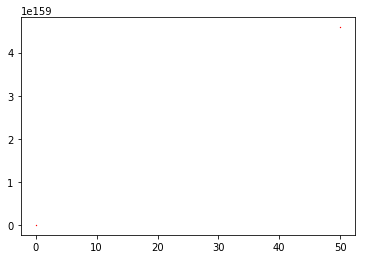

In [126]:
weights,bais = grad_obj.train(dataframe)

In [127]:
grad_obj.test(test_data,weights,bais)

-5.430054812924543e+299
